In [41]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
import regions
from regions import Regions
from astropy.table import Table
from astropy.nddata import Cutout2D
from scipy.ndimage import gaussian_filter


In [2]:
cd ..

/home/savannahgramze/research/lactea-filament/lactea-filament


In [3]:
from jwst_plots import JWSTCatalog

In [4]:
basepath = '/home/savannahgramze/research/Research/JWST/cloudc/'

# Load Catalog

In [5]:
fn_405 = f'{basepath}/images/F410_reproj_merged-fortricolor.fits'
ww = WCS(fits.open(fn_405)[0].header)

In [6]:
cat_fn = f'{basepath}/basic_merged_indivexp_photometry_tables_merged.fits'
basetable = Table.read(cat_fn)

In [7]:
base_jwstcatalog = JWSTCatalog(basetable)
mask_qf = base_jwstcatalog.get_qf_mask(0.4)
cat_use = JWSTCatalog(basetable[mask_qf])

In [ ]:
reg_filament = Regions.read(f'./regions_/filament_long.region')
reg_filhole = Regions.read(f'./regions_/filhole.region')
reg_cloudd = Regions.read(f'./regions_/cloudd.region')
reg_cloudc1 = Regions.read(f'./regions_/cloudc1.region')
reg_cloudc2 = Regions.read(f'./regions_/cloudc2.region')
#reg_filament_long = Regions.read(f'{basepath}/regions_/filament_long.region')

In [16]:
cat_filament = JWSTCatalog(cat_use.table_region_mask(reg_filament, wcs=ww))
cat_cloudd =   JWSTCatalog(cat_use.table_region_mask(reg_cloudd, wcs=ww))
cat_cloudc1 =  JWSTCatalog(cat_use.table_region_mask(reg_cloudc1, wcs=ww))
cat_cloudc2 =  JWSTCatalog(cat_use.table_region_mask(reg_cloudc2, wcs=ww))

In [17]:
mask_outside = ~cat_use.get_region_mask(reg_filament, wcs=ww) & ~cat_use.get_region_mask(reg_cloudd, wcs=ww) & ~cat_use.get_region_mask(reg_cloudc1, wcs=ww) & ~cat_use.get_region_mask(reg_cloudc2, wcs=ww)
cat_outside = JWSTCatalog(cat_use.catalog[mask_outside])

In [18]:
mask_filament = cat_use.get_region_mask(reg_filament, wcs=ww) & ~cat_use.get_region_mask(reg_filhole, wcs=ww)
cat_only_filament = JWSTCatalog(cat_use.catalog[mask_filament])

# Bin stars

<Axes: xlabel='F212N - F410M', ylabel='F212N'>

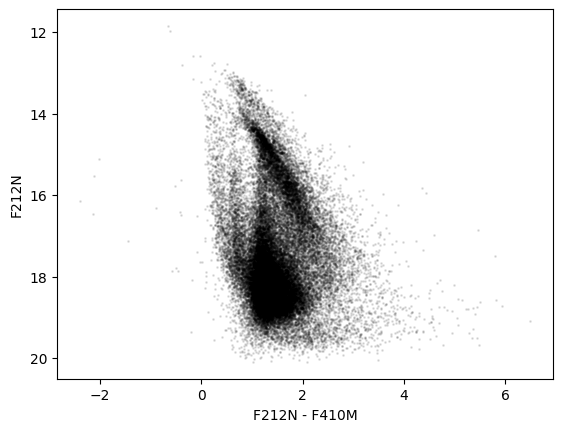

In [40]:
cat_use.plot_CMD('F212N', 'F410M', 'F212N', color='black', alpha=0.1, label='All', s=1)

In [44]:
b = np.linspace(14, 21, 50)
h_filament, b_filament = np.histogram(cat_filament.catalog['mag_ab_f410m'], bins=b)
h_cloudd, b_cloudd = np.histogram(cat_cloudd.catalog['mag_ab_f410m'], bins=b)
h_cloudc1, b_cloudc1 = np.histogram(cat_cloudc1.catalog['mag_ab_f410m'], bins=b)
h_cloudc2, b_cloudc2 = np.histogram(cat_cloudc2.catalog['mag_ab_f410m'], bins=b)
h_outside, b_outside = np.histogram(cat_outside.catalog['mag_ab_f410m'], bins=b)

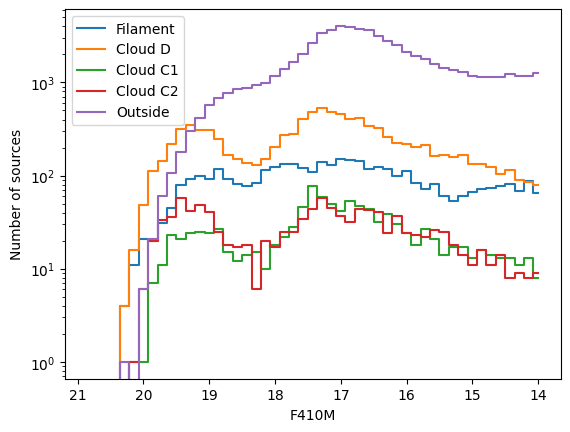

In [45]:
plt.step(b_filament[:-1], h_filament, label='Filament', where='mid')
plt.step(b_cloudd[:-1], h_cloudd, label='Cloud D', where='mid')
plt.step(b_cloudc1[:-1], h_cloudc1, label='Cloud C1', where='mid')
plt.step(b_cloudc2[:-1], h_cloudc2, label='Cloud C2', where='mid')
plt.step(b_outside[:-1], h_outside, label='Outside', where='mid')

plt.yscale('log')
plt.legend()
plt.xlabel('F410M')
plt.ylabel('Number of sources')
plt.gca().invert_xaxis()

In [46]:
b = np.linspace(14, 21, 50)
h_filament, b_filament = np.histogram(cat_filament.catalog['mag_ab_f212n'], bins=b)
h_cloudd, b_cloudd = np.histogram(cat_cloudd.catalog['mag_ab_f212n'], bins=b)
h_cloudc1, b_cloudc1 = np.histogram(cat_cloudc1.catalog['mag_ab_f212n'], bins=b)
h_cloudc2, b_cloudc2 = np.histogram(cat_cloudc2.catalog['mag_ab_f212n'], bins=b)
h_outside, b_outside = np.histogram(cat_outside.catalog['mag_ab_f212n'], bins=b)

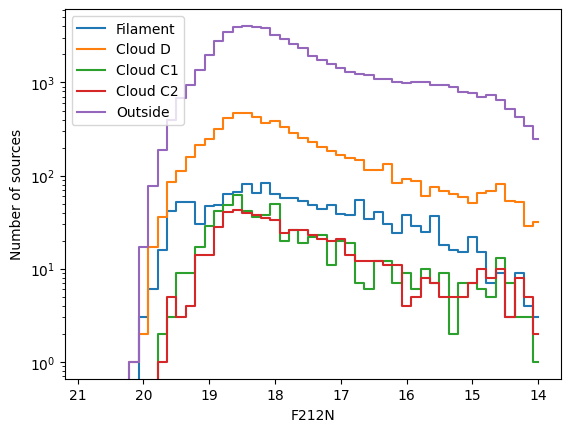

In [47]:
plt.step(b_filament[:-1], h_filament, label='Filament', where='mid')
plt.step(b_cloudd[:-1], h_cloudd, label='Cloud D', where='mid')
plt.step(b_cloudc1[:-1], h_cloudc1, label='Cloud C1', where='mid')
plt.step(b_cloudc2[:-1], h_cloudc2, label='Cloud C2', where='mid')
plt.step(b_outside[:-1], h_outside, label='Outside', where='mid')

plt.yscale('log')
plt.legend()
plt.xlabel('F212N')
plt.ylabel('Number of sources')
plt.gca().invert_xaxis()

# Spatial Stellar Density

In [22]:
fn = f'{basepath}/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
#/images/F405_reproj_merged-fortricolor.fits'
#'/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
#im = ImageModel(fn)
hdu = fits.open(fn)[1]
ww = WCS(hdu.header)

position = (hdu.header['CRPIX1'], hdu.header['CRPIX2'])
center = ww.pixel_to_world(position[0], position[1])
size = (2.55*u.arcmin, 8.4*u.arcmin)
cutout = Cutout2D(hdu.data, position=position, size=size, wcs=ww)

reg = regions.RectangleSkyRegion(center=center, 
                                 width=size[0], height=size[1], angle=8*u.deg)
#crds_in = crds_ref[reg.contains(crds_ref, wcs=cutout.wcs)]
crds_in = cat_use.table_region_mask([reg], wcs=ww)['skycoord_ref']

#plt.figure(figsize=(14,8))
#ax = plt.subplot(111, projection=ww)
##ax = plt.subplot(111, projection=cutout.wcs)
##ax.imshow(cutout.data, vmin=0, vmax=50)
#ax.imshow(hdu['SCI'].data, vmin=0, vmax=50)
##ax.scatter(crds_ref.ra, crds_ref.dec, edgecolor='r', facecolor='none', transform=ax.get_transform('world'), marker='.')
#ax.scatter(crds_in.ra, crds_in.dec, edgecolor='r', facecolor='none', transform=ax.get_transform('world'), marker='.')
#
#plt.tight_layout()
#plt.show()

Set DATE-AVG to '2023-04-20T10:07:44.724' from MJD-AVG.
Set DATE-END to '2023-04-25T05:06:53.406' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    -3.177752 from OBSGEO-[XYZ].
Set OBSGEO-H to 1298809712.873 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


## Making the Grid

In [27]:
size = (2.55*u.arcmin, 8.4*u.arcmin)
bins_ra = np.arange(0, size[1].to(u.arcsec).value, 1)
bins_dec = np.arange(0, size[0].to(u.arcsec).value, 1)

In [28]:
bins_pix_ra = bins_ra/ww.proj_plane_pixel_scales()[1].to(u.arcsec).value
bins_pix_dec= bins_dec/ww.proj_plane_pixel_scales()[1].to(u.arcsec).value

## Putting Catalog Into Grid

In [29]:
crds_use_pix = np.array(ww.world_to_pixel(crds_in))#.T

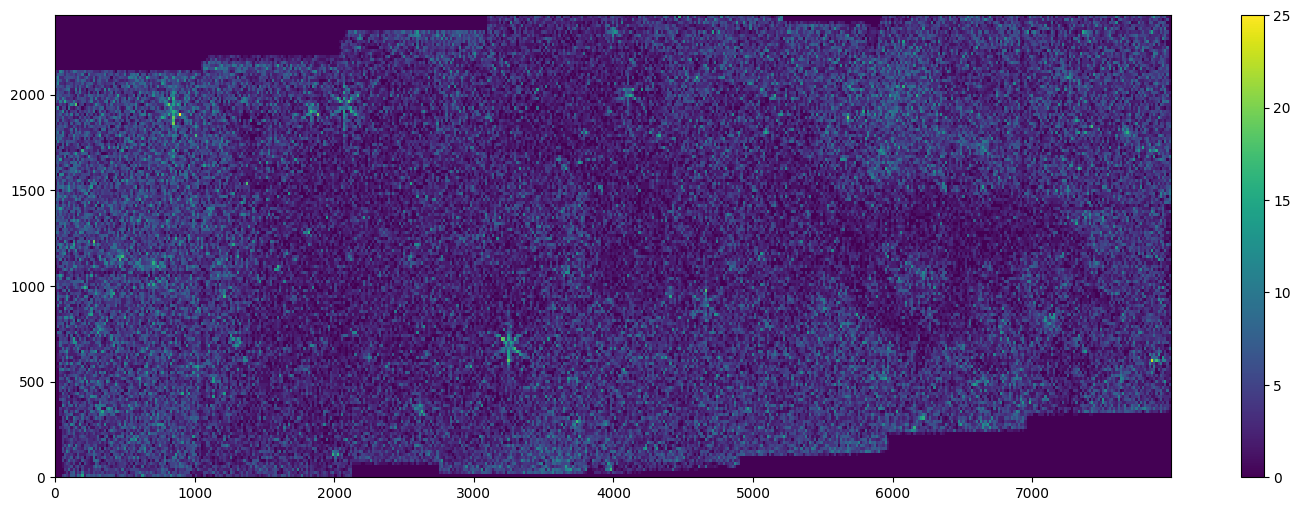

In [30]:
plt.figure(figsize=(18, 6))
plt.hist2d(crds_use_pix[0], crds_use_pix[1], bins=[bins_pix_ra, bins_pix_dec])
plt.colorbar()
print()

## Color

In [31]:
color = cat_use.catalog['mag_ab_f182m'] - cat_use.catalog['mag_ab_f410m']

(20.0, 14.0)

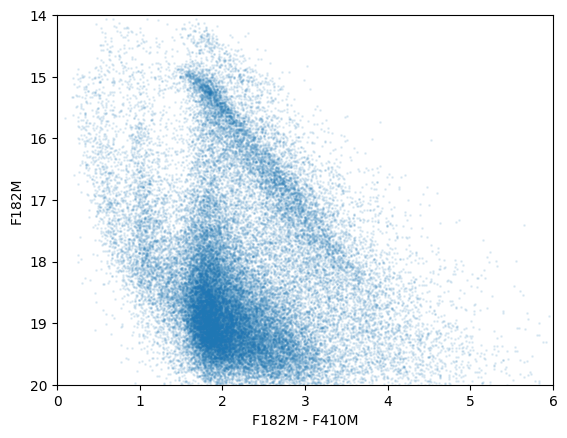

In [37]:
ax = plt.subplot(111)
cat_use.plot_CMD('F182M', 'F410M', 'F182M', alpha=0.1, label='All', s=1, ax=ax)
ax.set_xlim(0, 6)
ax.set_ylim(20, 14)

In [38]:
bins_color = np.arange(0, 6, 1)

In [39]:
color_couples = np.array([(b, b+1) for b in bins_color])
color_couples

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6]])

## Color Slices

In [54]:
def star_density_color(tbl, ww, dx=1, blur=False):
    pos_smudge = SkyCoord('17:46:23.6171497910', '-28:36:43.0690114397', unit=(u.hourangle, u.deg), frame='icrs')
    size = (2.55*u.arcmin, 8.4*u.arcmin) # approx size of field
    bins_ra = np.arange(0, size[1].to(u.arcsec).value, dx)
    bins_dec = np.arange(0, size[0].to(u.arcsec).value, dx)

    bins_pix_ra = bins_ra/ww.proj_plane_pixel_scales()[1].to(u.arcsec).value
    bins_pix_dec= bins_dec/ww.proj_plane_pixel_scales()[1].to(u.arcsec).value

    crds_pix = np.array(ww.world_to_pixel(tbl['skycoord_ref']))

    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111, projection=ww)
    ax.set_xlabel('RA')
    ax.set_ylabel('Dec')
    h, xedges, yedges = np.histogram2d(crds_pix[0], crds_pix[1], bins=[bins_pix_ra, bins_pix_dec])
    if not blur:
        h1, xedges1, yedges1, y = ax.hist2d(crds_pix[0], crds_pix[1], bins=[bins_pix_ra, bins_pix_dec])
        plt.colorbar(h1)
        return h
    elif blur:
        blurred = gaussian_filter(h, 1)
        im = ax.imshow(blurred.swapaxes(0,1))
        plt.colorbar(im)
        return blurred

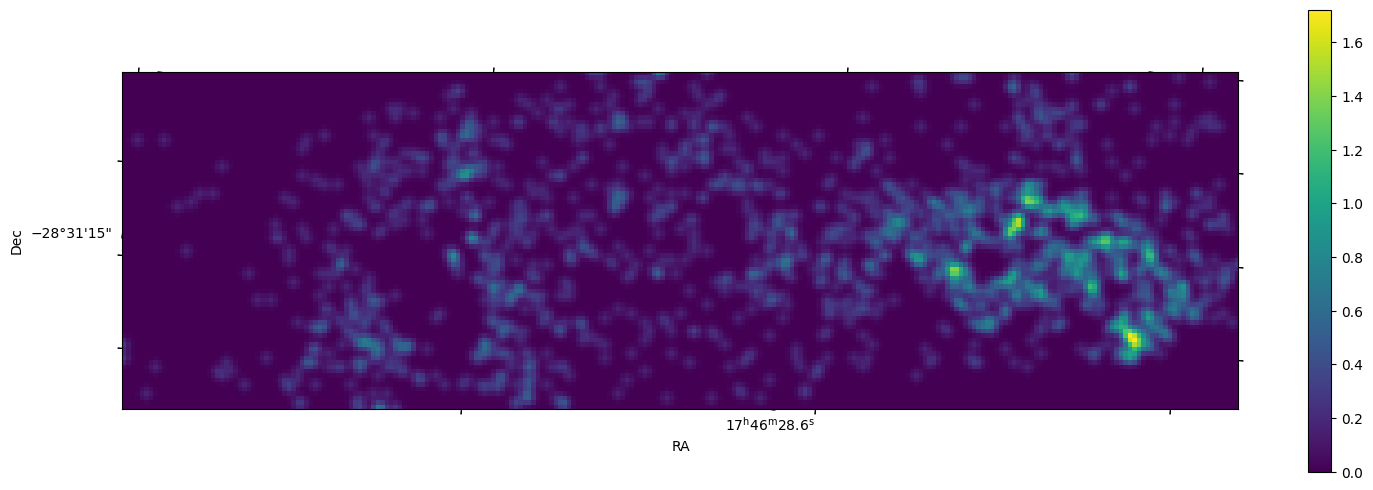

In [55]:
tbl_color1 = cat_use.catalog[(color>4) & (color<5) & (cat_use.catalog['mag_ab_f410m']<20)]
h = star_density_color(tbl_color1, ww, dx=2, blur=True)

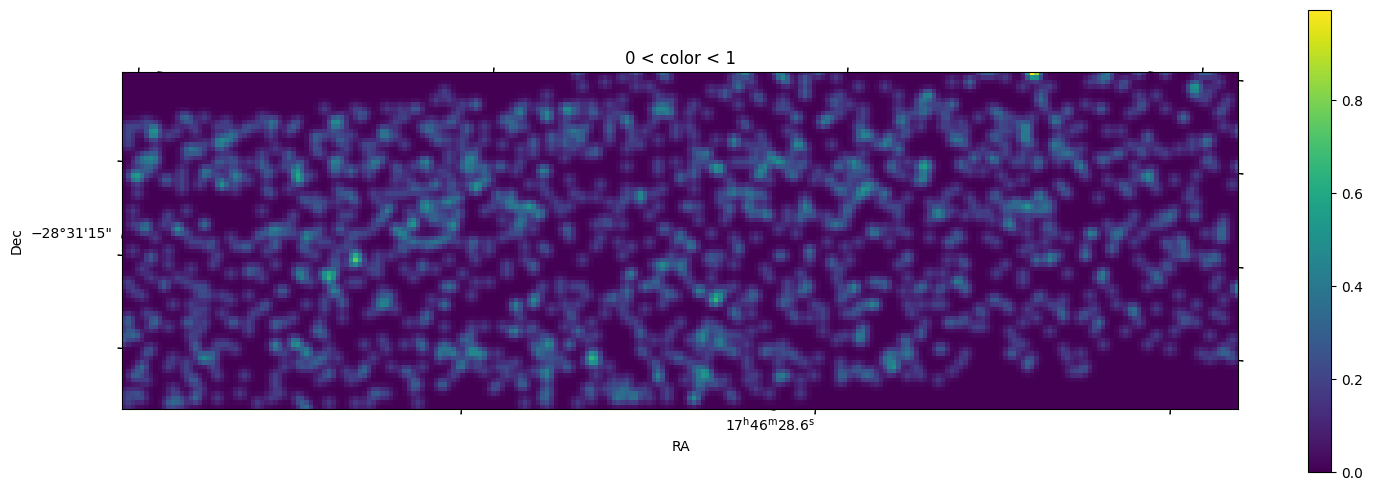

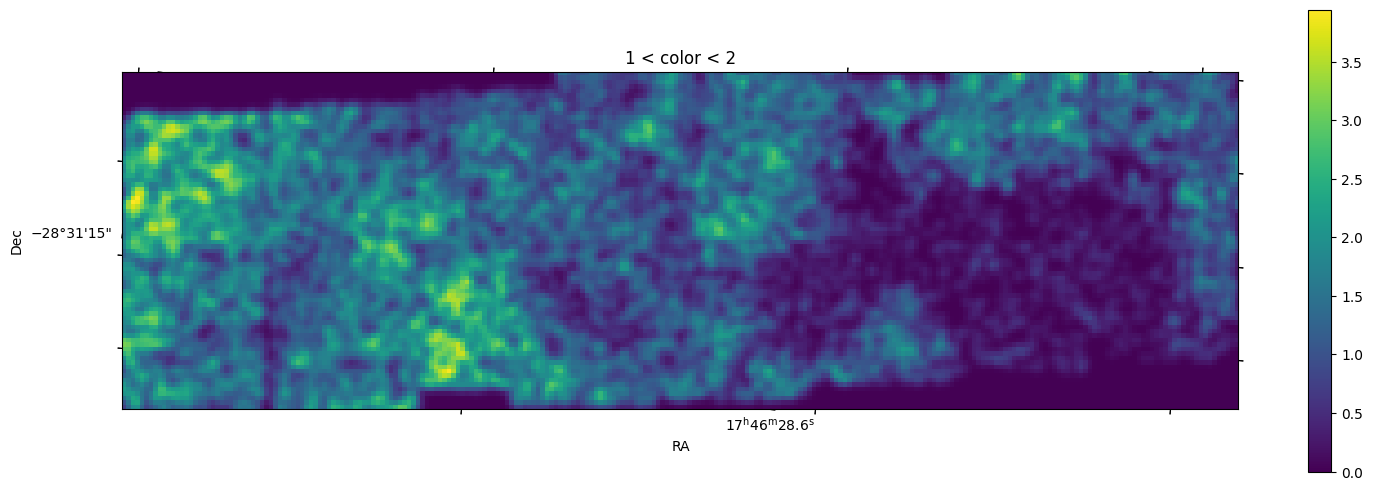

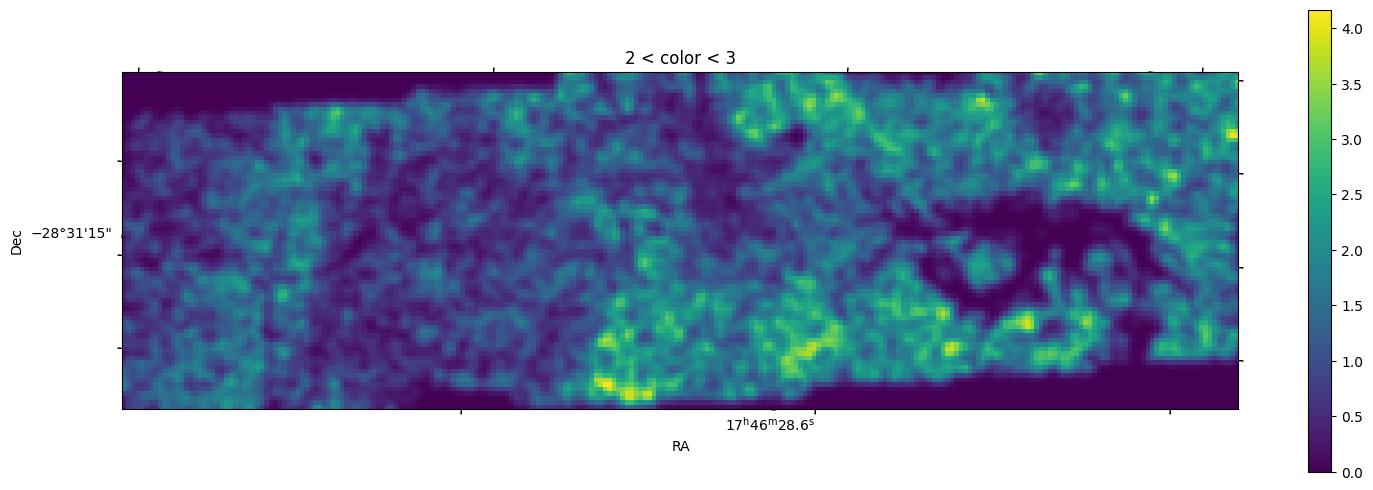

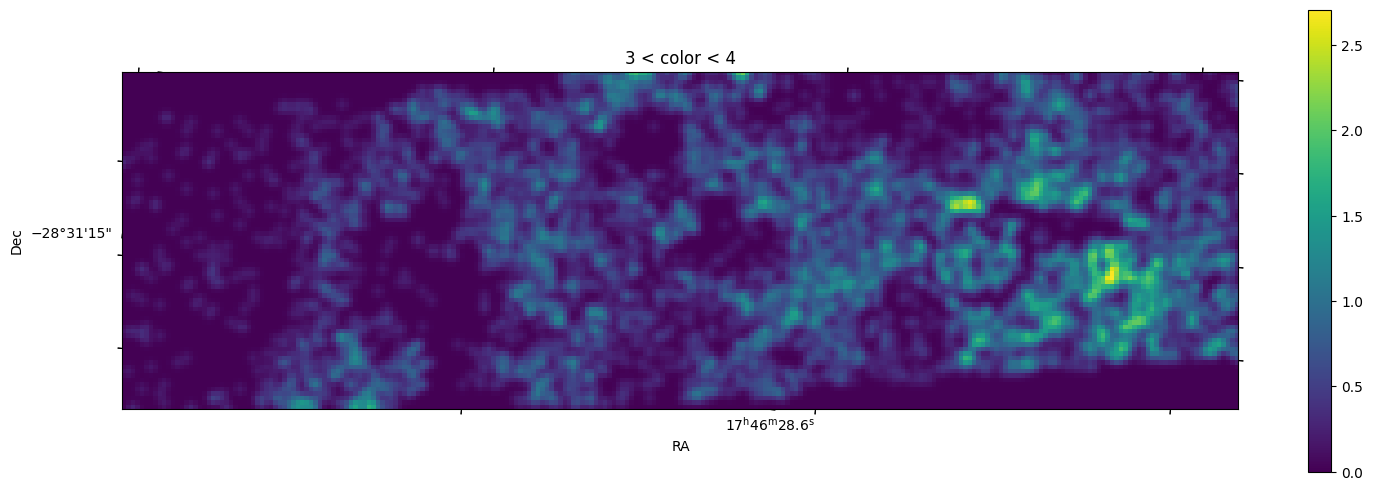

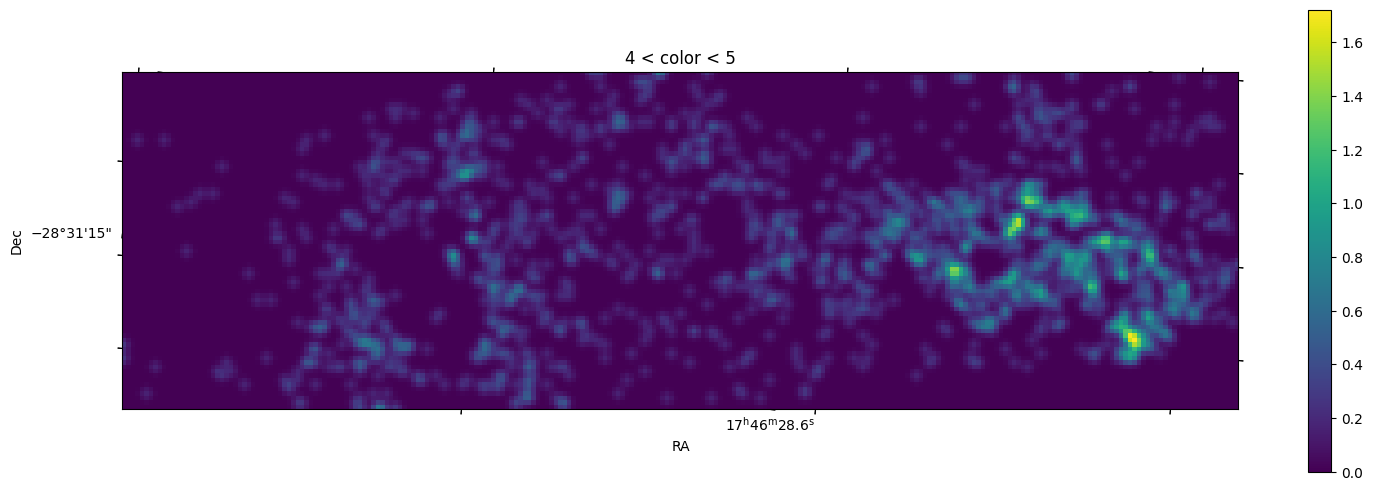

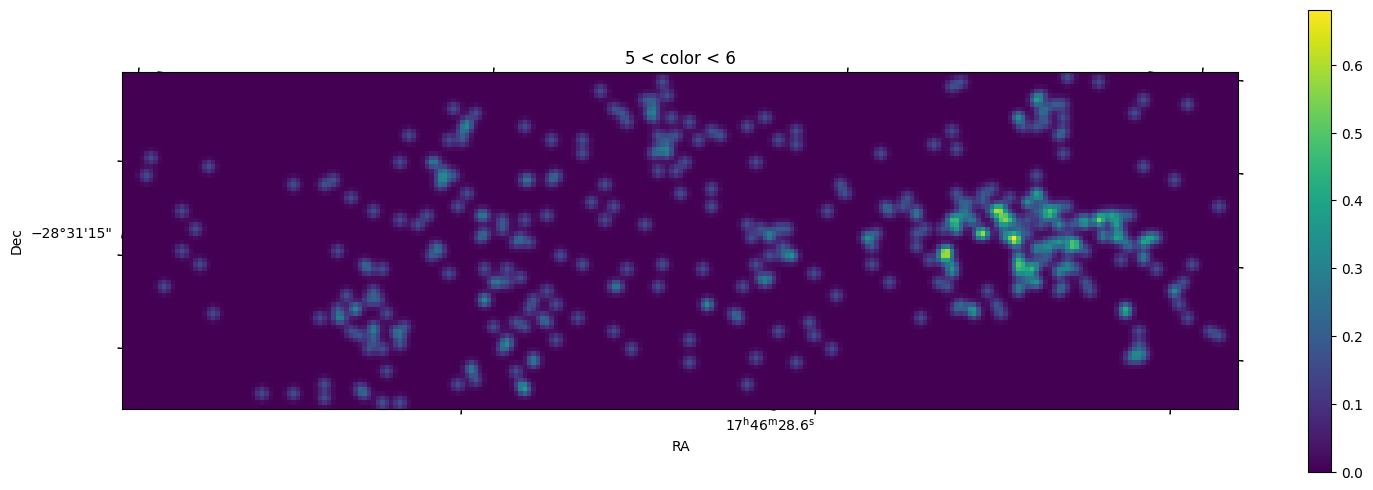

In [51]:
for c in color_couples:
    tbl_color = cat_use.catalog[(color>c[0]) & (color<c[1]) & (cat_use.catalog['mag_ab_f410m']<20)]
    h = star_density_color(tbl_color, ww, dx=2, blur=True)
    plt.title(f'{c[0]} < color < {c[1]}')
    plt.show()